# Influential points: Leverages and Outliers

When conducting EDA, it is important to be aware that some data points can exert an outsized effect on statistical analysis, due to their position with respect to the overall sampling distribution. These data points are known as *influential* data points. In this lesson we will discuss the different types of influential data point, and how to handle them.

## Leverages
> Leverages are are data points that have an outsized influence on a statistical model due to their position or value in the X axis. Their presence can disproportionately affect the outcome of an analysis. 

The code snippet below generates a plot of the relationship between the floor plan area and price of a sample of properties. The datapoint `5000, 500` is a leverage point, because it has a floor plan area that is a lot larger than the rest of the sample, even though it fits the trend perfectly.


In [14]:

#@title Click the play button to run this cell and set up some things we need for this lesson
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
#plot the data with seaborn
plt.rc("axes.spines", top=False, right=False)
sns.set_style(style='darkgrid', rc=None)

five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
style.use('fivethirtyeight')
sns.set_palette(five_thirty_eight)


df_1 = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/influential/1.txt", sep="\t", encoding="utf-16")
df_2 = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/influential/2.txt", sep="\t", encoding="utf-16")
df_3 = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/influential/3.txt", sep="\t", encoding="utf-16")
df_4 = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/influential/4.txt", sep="\t", encoding="utf-16")
df_list = [df_1, df_2, df_3, df_4]

for df in df_list:
    df.drop("Row", axis=1, inplace=True)
    df.columns = ["YoE", "Salary"] # YoE = Years of Experience



<Axes: >

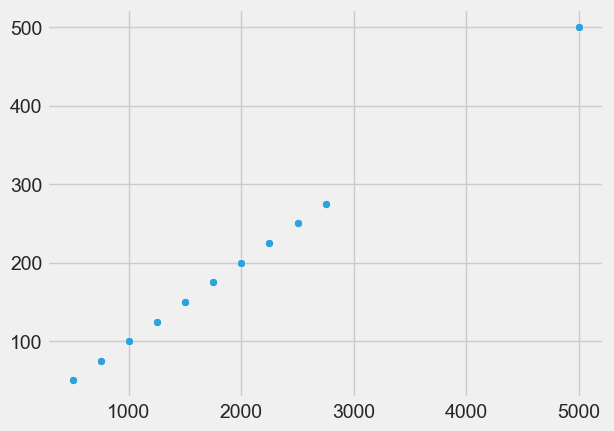

In [6]:

floorplan_area = [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 5000]
price_in_thousands = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 500]


sns.scatterplot(x=floorplan_area, y=price_in_thousands)

Leverages exert strong effects on statistical models for a variety of reasons:

1. **Position in Predictor Space**: Leverage points are typically extreme or distant from the mean of the predictor variables. Their "distance" from other data points means that they can pull or influence the regression line or plane more than other points. In the above example, removing the leverage point drastically affects the mean floor plan area of the sample


In [8]:
floorplan_area = [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 5000]
print("mean floorplan area with leverage: ", sum(floorplan_area)/len(floorplan_area))
print("mean floorplan area without leverage: ", sum(floorplan_area[:-1])/len(floorplan_area[:-1]))




mean floorplan area with leverage:  1931.8181818181818
mean floorplan area without leverage:  1625.0




2. **Influence on Slope and Intercept**: In linear regression, the goal is to find the best-fitting line that minimizes the sum of the squared residuals. A leverage point, due to its extreme position, can have a disproportionate effect on the slope and intercept of this line. Even if the leverage point's response value (Y-value) is broadly in line with the trend, its extreme predictor value (X-value) can change the direction or steepness of the regression line.

To illustrate this, let's make a small (10%) change to the price of the 5000 square-metre property, and see how it affects the regression:



slope of no leverage:  0.1
slope of leverage:  0.1111111111111111


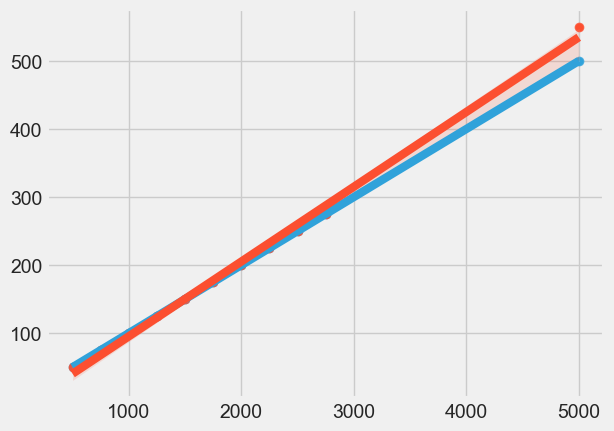

In [12]:
price_no_change = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 500]
price_leverage_change = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 550]

# plot both distributions
sns.scatterplot(x=floorplan_area, y=price_no_change)
sns.scatterplot(x=floorplan_area, y=price_leverage_change)

# fit a line to both distributions
sns.regplot(x=floorplan_area, y=price_no_change)
sns.regplot(x=floorplan_area, y=price_leverage_change)

# print the slope of both distributions
print("slope of no leverage: ", (price_no_change[-1]-price_no_change[0])/(floorplan_area[-1]-floorplan_area[0]))
print("slope of leverage: ", (price_leverage_change[-1]-price_leverage_change[0])/(floorplan_area[-1]-floorplan_area[0]))

As a counterexample, making the same magnitude change to a data point closer to the mean of the X-distribution has much less effect: 


slope of no leverage:  0.1
slope of leverage:  0.1


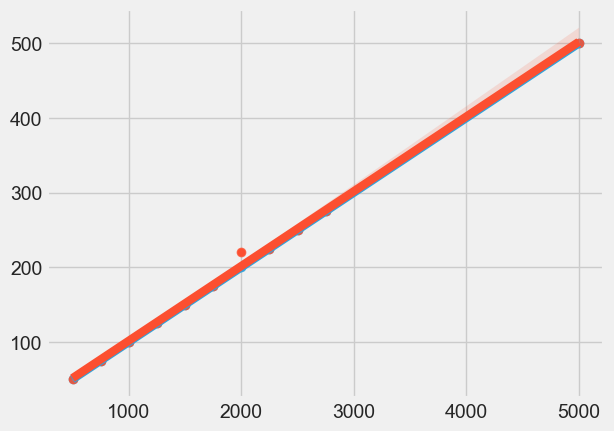

In [13]:
price_no_change = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 500]
price_leverage_change = [50, 75, 100, 125, 150, 175, 220, 225, 250, 275, 500]

# plot both distributions
sns.scatterplot(x=floorplan_area, y=price_no_change)
sns.scatterplot(x=floorplan_area, y=price_leverage_change)

# fit a line to both distributions
sns.regplot(x=floorplan_area, y=price_no_change)
sns.regplot(x=floorplan_area, y=price_leverage_change)

# print the slope of both distributions
print("slope of no leverage: ", (price_no_change[-1]-price_no_change[0])/(floorplan_area[-1]-floorplan_area[0]))
print("slope of leverage: ", (price_leverage_change[-1]-price_leverage_change[0])/(floorplan_area[-1]-floorplan_area[0]))



3. **Weight in Calculations**: The influence of a data point on a regression model is a function of its residual (the difference between its observed and predicted values) and its leverage. Even if a leverage point has a small residual, its high leverage can amplify its influence on the model.

4. **Potential to Inflate Variance**: High-leverage points can increase the variance of the estimated regression coefficients, making them less precise.

5. **Sensitivity to Small Changes**: Regression models can be sensitive to small changes in high-leverage points. A slight alteration in the value of a leverage point can lead to a substantial change in the regression equation.





## Outliers
> Outliers are the "odd ones out" in a group of data. They are data points that differ markedly from the majority of other observations in a dataset. These values can arise from variability in the data or potential errors, and they often warrant further investigation.
